In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print ("Scikit-Learn version: ", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)


# 필요한 거 inport
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import time

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
from sklearn.decomposition import PCA

import random

from sklearn.preprocessing import FunctionTransformer


sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)
Scikit-Learn version:  1.3.0


In [2]:
import matplotlib.pyplot as plt

def plot_digit(image_data, axis=False):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")

    if not axis:
        plt.axis("off")

def plot_multi(img,start=0,end=100):
    plt.figure(figsize=(9, 9))
    for idx, image_data in enumerate(img[start:end]):
        plt.subplot(10, 10, idx + 1)
        plot_digit(image_data)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

def plot_multi_random(images,labels):

    # 무작위로 100개의 인덱스 선택
    random_indices = np.random.choice(len(images), size=100, replace=False)

    # 선택된 인덱스에 해당하는 이미지와 레이블 시각화
    fig, axes = plt.subplots(10, 10, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        index = random_indices[i]
        image = images[index].reshape(28, 28)
        label = labels[index]
        ax.imshow(image, cmap='binary')
        ax.set_title(f"Label: {label}")
        ax.axis('on')
    plt.tight_layout()
    plt.show()

import random

# 데이터셋 순서 섞기
def shuffle_dataset(X, y):
    shuffle_idx = np.random.permutation(len(X))
    X_shuffled = X[shuffle_idx]
    y_shuffled = y[shuffle_idx]
    return X_shuffled, y_shuffled

def is_numpy(arr):
    return isinstance(arr, np.ndarray)



# 가. MNIST dataset 추가 및 분석

get the data  
diacover and visualize data

shape, dtype
레이블 종류
실제 이미지


## data preparation

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

#original MNIST
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X, y = mnist.data, mnist.target


In [5]:
# 레이블 수정 하기전 handmade MNIST
num_trVal = np.load( "digit_data_TrVal.npz")
num_test = np.load("digit_data_10_Test.npz")
sym_trVal = np.load("op_data_TrVal.npz")
sym_test = np.load("op_data_10_Test.npz")

FileNotFoundError: [Errno 2] No such file or directory: 'digit_data_TrVal.npz'

original 과 handmade의 차이
shape, dtype 등등 확인

In [ ]:
# Original Mnist Data Set.shape + #Handmade Mnist Data Set.shape

print("Original Mnist data set             이미지 모양 :", X.shape, "레이블 모양", y.shape)

print("Handmade Mnist data set(Trval) 숫자 이미지 모양 :", num_trVal['img'].shape, "레이블 모양 :", num_trVal['label'].shape)
print("Handmade Mnist data set(Test)  숫자 이미지 모양 :", num_test['img'].shape, " 레이블 모양 :", num_test['label'].shape)

print("Handmade Mnist data set(Trval) 기호 이미지 모양 :", sym_trVal['img'].shape, "레이블 모양 :", sym_trVal['label'].shape)
print("Handmade Mnist data set(Test)  기호 이미지 모양 :", sym_test['img'].shape, " 레이블 모양 :", sym_test['label'].shape)


In [ ]:
#원본 Mnist Data Set.dtye
print("Original Mnist data set             이미지 dtype :", X.dtype, "레이블 dtype :", y.dtype)

print("Handmade Mnist data set(Trval) 숫자 이미지 dtype :", num_trVal['img'].dtype, "레이블 dtype :", num_trVal['label'].dtype)
print("Handmade Mnist data set(Test)  숫자 이미지 dtype :", num_test['img'].dtype, "레이블 dtype :", num_test['label'].dtype)

print("Handmade Mnist data set(Trval) 기호 이미지 dtype :", sym_trVal['img'].dtype, "레이블 dtype :", sym_trVal['label'].dtype)
print("Handmade Mnist data set(Test)  기호 이미지 dtype :", sym_test['img'].dtype, "레이블 dtype :", sym_test['label'].dtype)

shape가 원본이 784, 핸드메이트가 (28.28)

784로 통일


In [12]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, random_state=42)

# num, sym 합체?
X_train_handmade = np.concatenate((num_trVal['img'], sym_trVal['img']), axis=0)
X_test_handmade = np.concatenate((num_test['img'], sym_test['img']), axis=0)
y_train_handmade = np.concatenate((num_trVal['label'], sym_trVal['label']), axis=0)
y_test_handmade = np.concatenate((num_trVal['label'], sym_trVal['label']), axis=0)

#모양 통일
X_train_handmade = X_train_handmade.reshape(len(X_train_handmade),784)
X_test_handmade = X_test_handmade.reshape(len(X_test_handmade),784)

# 인덱스 섞기
X_train_handmade, y_train_handmade = shuffle_dataset(X_train_handmade, y_train_handmade)
X_test_handmade, y_test_handmade = shuffle_dataset(X_test_handmade, y_test_handmade)


# 검증데이터 분리 --> 비율 정하는데 사용
X_train_handmade, X_valid_handmade, y_train_handmade, y_valid_handmade = train_test_split(X_train_handmade, y_train_handmade, test_size=0.1, random_state=42)

NameError: name 'num_trVal' is not defined

# 데이터셋 비율 정하기

안돌려도 됨

In [ ]:

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

binarize = [
    ('binarizer', Binarizer(threshold=0.5)),
    ("rnd", rnd_clf)
]

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
valid_sizes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
for valid_size in valid_sizes:
  # 검증데이터 분리
  X_train_handmade, X_valid_handmade, y_train_handmade, y_valid_handmade = train_test_split(X_train_handmade, y_train_handmade, test_size=valid_size, random_state=42)
  for test_size in test_sizes:

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
      X_combined = np.concatenate((X_train, X_train_handmade), axis=0)
      y_combined = np.concatenate((y_train, y_train_handmade), axis=0)

      dataset_indices = list(range(len(X_combined)))
      random.shuffle(dataset_indices)
      X_combined = [X_combined[i] for i in dataset_indices]
      y_combined = [y_combined[i] for i in dataset_indices]

      rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
      pipeline_binarize = Pipeline(binarize)
      pipeline_binarize.fit(X_combined, y_combined)

      predictions = pipeline_binarize.predict(X_valid_handmade)
      accuracy_binarize = accuracy_score(y_valid_handmade, predictions)

      print(f'valid_size={valid_size}, test_size={test_size} -> Accuracy: {accuracy_binarize:.4f}')



In [ ]:
test_size = 1 - 0.21428571429


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
X_combined = np.concatenate((X_train, X_train_handmade), axis=0)
y_combined = np.concatenate((y_train, y_train_handmade), axis=0)

dataset_indices = list(range(len(X_combined)))
random.shuffle(dataset_indices)
X_combined = [X_combined[i] for i in dataset_indices]
y_combined = [y_combined[i] for i in dataset_indices]

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
pipeline_binarize = Pipeline(binarize)
pipeline_binarize.fit(X_combined, y_combined)

predictions = pipeline_binarize.predict(X_valid_handmade)
accuracy_binarize = accuracy_score(y_valid_handmade, predictions)

print(f'test_size={test_size} -> Accuracy: {accuracy_binarize:.4f}')

In [ ]:
from sklearn.preprocessing import Binarizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import random

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

binarize = [
    ('binarizer', Binarizer(threshold=0.5)),
    ("rnd", rnd_clf)
]

OG_sizes = [0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49,0.56,0.63,0.70,0.78,0.85,0.92,1] #OGdataset비율
ag_sizes = [0.083, 0.16, 0.24, 0.32, 0.40, 0.48, 0.56, 0.64, 0.72, 0.8,0.88,1] #증강데이터비율

for valid_size in ag_sizes:
    X_train_ag, X_valid_ag, y_train_ag, y_valid_ag = train_test_split(X_train_handmade_augmented,y_train_handmade_augmented, test_size=valid_size, random_state=42)
    X_combined_first = np.concatenate((X_train_handmade, X_train_ag), axis=0)
    y_combined_first = np.concatenate((y_train_handmade, y_train_ag), axis=0)

    for test_size in OG_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        X_combined_final = np.concatenate((X_train, X_combined_first), axis=0)
        y_combined_final = np.concatenate((y_train, y_combined_first), axis=0)

        dataset_indices = list(range(len(X_combined_final)))
        random.shuffle(dataset_indices)
        X_combined_final = [X_combined_final[i] for i in dataset_indices]
        y_combined_final = [y_combined_final[i] for i in dataset_indices]

        pipeline_binarize = Pipeline(binarize)

        # cross_val_score를 이용해 cross validation 수행
        scores = cross_val_score(pipeline_binarize, X_combined_final, y_combined_final, cv=5)
        print("Test size: {}, Valid size: {}, Cross-validation score: {:.2f}".format(test_size, valid_size, scores.mean()))

데이터셋 분할

In [ ]:
# original + handmade dataset
X_train_combined = np.concatenate((X_train_original, X_train_handmade), axis=0)
X_test_combined = np.concatenate((X_test_original, X_test_handmade), axis=0)
y_train_combined = np.concatenate((y_train_original, y_train_handmade), axis=0)
y_test_combined = np.concatenate((y_test_original, y_test_handmade), axis=0)

import random

dataset_indices = list(range(len(X_train_combined)))
random.shuffle(dataset_indices)
shuffled_dataset = [X_train_combined[i] for i in dataset_indices]

dataset_indices = list(range(len(X_test_combined)))
random.shuffle(dataset_indices)
shuffled_dataset = [X_test_combined[i] for i in dataset_indices]

dataset_indices = list(range(len(y_train_combined)))
random.shuffle(dataset_indices)
shuffled_dataset = [y_train_combined[i] for i in dataset_indices]

dataset_indices = list(range(len(y_test_combined)))
random.shuffle(dataset_indices)
shuffled_dataset = [y_test_combined[i] for i in dataset_indices]

# 나. Hand-made dataset과 original dataset을 이용하여 inference 성능 및 원인 분석




 hand-made test dataset을 구성

In [ ]:
#별도로 만든 Handmadedataset
test_handmade = np.load( "handmade_test.npz")

test_handmade_img = test_handmade['img']
test_handmade_label = test_handmade['label']

test_handmade_img = test_handmade_img.reshape(len(test_handmade_img),784)

 Hand-made test dataset과 original MNIST test dataset을 이용하여 inference 성능 및 원인 분석

 실습코드의 machine learning
model과 original MNIST dataset을 이용하여 학습시킨 후 hand-made test dataset과
원래의 MNIST test dataset에 대해 각각 prediction후 score를 비교

Dataset의 특성의 차이를 이미지 특성과 다양한 attribute 계산을 통해 분석하고 원인을 추론한다.

In [ ]:
# RandomForestClassifier 모델 학습
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(X_train_original, y_train_original)

rnd_predictions = rnd_clf.predict(X_test_original)
rnd_accuracy = accuracy_score(y_test_original, rnd_predictions)
print(f"original Accuracy: {rnd_accuracy:.4f}")

rnd_predictions = rnd_clf.predict(test_handmade_img)
rnd_accuracy = accuracy_score(test_handmade_label, rnd_predictions)
print(f"handmade Accuracy: {rnd_accuracy:.4f}")

레이블이 이상하게 되있다 -> cleaning   
중앙 정렬  -> contering  
이진화  -> binarize  
선이 포함됨   -> 뭐하긴함  



# Cleaning 작업

안돌려도 됨

## 1. relabeling
몇몇 데이터가 label이 잘못 되어있어서 해당 내용을 확인 후 재 배열함

In [ ]:
all_num_test = np.load("digit_data_10_Test_1.npz")
all_num_trVal = np.load("digit_data_TrVal_1.npz")
all_sym_test = np.load("op_data_10_Test_1.npz")
all_sym_trVal = np.load("op_data_TrVal_1.npz")

In [ ]:
num_trVal_labeled, num_cnt = np.unique(all_num_trVal["label"], return_counts=True)

for i in range(len(num_trVal_labeled)):
    print(f"{num_trVal_labeled[i]} 개수: {num_cnt[i]}")

In [ ]:
sym, sym_cnt = np.unique(all_sym_trVal["label"],return_counts=True)

for i in range(len(sym)):
    print(f"{sym[i]} 개수: {sym_cnt[i]}")

so we can see in the num there is +,-,/,=,x(sym) labels,
and in the sym there is 0-9, and numerous misleading labels(10-14,%,*)

the plan is:
1. replace(concentrate the 0-9 in sym and symbolic in num
2. define each labels into appropriate labels
- we can assume % is /, * is x, X is x, etc., so it should not be hard(i guess?)

## 1. replace

In [ ]:
# num test

num_test_img = all_num_test["img"]
num_test_label = all_num_test["label"]

num_test_img_error = num_test_img[np.where((num_test_label == '+') | (num_test_label == '-') | (num_test_label == 'x') | (num_test_label == '/') | (num_test_label == '='))]
num_test_img_real = num_test_img[np.where((num_test_label != '+') & (num_test_label != '-') & (num_test_label != 'x') & (num_test_label != '/') & (num_test_label != '='))]

num_test_label_error = num_test_label[np.where((num_test_label == '+') | (num_test_label == '-') | (num_test_label == 'x') | (num_test_label == '/') | (num_test_label == '='))]
num_test_label_real = num_test_label[np.where((num_test_label != '+') & (num_test_label != '-') & (num_test_label != 'x') & (num_test_label != '/') & (num_test_label != '='))]

In [ ]:
print(np.unique(num_test_label_real))
print(np.unique(num_test_label_error))

In [ ]:
# num trVal

num_trVal_img = all_num_trVal["img"]
num_trVal_label = all_num_trVal["label"]

num_trVal_img_error = num_trVal_img[np.where((num_trVal_label == '+') | (num_trVal_label == '-') | (num_trVal_label == 'x') | (num_trVal_label == '/') | (num_trVal_label == '='))]
num_trVal_img_real = num_trVal_img[np.where((num_trVal_label != '+') & (num_trVal_label != '-') & (num_trVal_label != 'x') & (num_trVal_label != '/') & (num_trVal_label != '='))]

num_trVal_label_error = num_trVal_label[np.where((num_trVal_label == '+') | (num_trVal_label == '-') | (num_trVal_label == 'x') | (num_trVal_label == '/') | (num_trVal_label == '='))]
num_trVal_label_real = num_trVal_label[np.where((num_trVal_label != '+') & (num_trVal_label != '-') & (num_trVal_label != 'x') & (num_trVal_label != '/') & (num_trVal_label != '='))]

In [ ]:
print(np.unique(num_trVal_label_real))
print(np.unique(num_trVal_label_error))

## 2. define to appropriate labels

before splitting, we should check the wrong labels and fix it

In [ ]:
# symbols test

sym_test_img = all_sym_test["img"]
sym_test_label = all_sym_test["label"]

# * check
sym_test_wrong_x1 = sym_test_img[np.where((sym_test_label == '*'))]
for i in range(5):
    plot_digit(sym_test_wrong_x1[i])
    plt.show()

so '*' is 'x', re-define into 'x'

In [ ]:
sym_test_label[np.where((sym_test_label == '*'))] = 'x'

In [ ]:
# X check
sym_test_wrong_x2 = sym_test_img[np.where((sym_test_label == 'X'))]
for i in range(5):
    plot_digit(sym_test_wrong_x2[i])
    plt.show()

In [ ]:
sym_test_label[np.where((sym_test_label == 'X'))] = 'x'

In [ ]:
# % check
sym_test_wrong_div = sym_test_img[np.where((sym_test_label == '%'))]
for i in range(5):
    plot_digit(sym_test_wrong_div[i])
    plt.show()

In [ ]:
sym_test_label[np.where((sym_test_label == '%'))] = '/'

In [ ]:
# check 10

sym_test_wrong_10 = sym_test_img[np.where((sym_test_label == '10'))]
for i in range(5):
    plot_digit(sym_test_wrong_10[i])
    plt.show()

In [ ]:
sym_test_label[np.where((sym_test_label == '10'))] = '+'

In [ ]:
# check 11

sym_test_wrong_11 = sym_test_img[np.where((sym_test_label == '11'))]
for i in range(5):
    plot_digit(sym_test_wrong_11[i])
    plt.show()

In [ ]:
sym_test_label[np.where((sym_test_label == '11'))] = '-'

In [ ]:
# check 12

sym_test_wrong_12 = sym_test_img[np.where((sym_test_label == '12'))]
for i in range(5):
    plot_digit(sym_test_wrong_12[i])
    plt.show()

In [ ]:
sym_test_label[np.where((sym_test_label == '12'))] = 'x'

In [ ]:
# check 13

sym_test_wrong_13 = sym_test_img[np.where((sym_test_label == '13'))]
for i in range(5):
    plot_digit(sym_test_wrong_13[i])
    plt.show()

In [ ]:
sym_test_label[np.where((sym_test_label == '13'))] = '/'

In [ ]:
# check 14

sym_test_wrong_14 = sym_test_img[np.where((sym_test_label == '14'))]
for i in range(5):
    plot_digit(sym_test_wrong_14[i])
    plt.show()

In [ ]:
sym_test_label[np.where((sym_test_label == '14'))] = '='

In [ ]:
# check

print(np.unique(sym_test_label))

0-9 would be separated later on

In [ ]:
# trVal

sym_trVal_img = all_sym_trVal["img"]
sym_trVal_label = all_sym_trVal["label"]

# *
sym_trVal_label[np.where((sym_trVal_label == '*'))] = 'x'

# X
sym_trVal_label[np.where((sym_trVal_label == 'X'))] = 'x'

# %
sym_trVal_label[np.where((sym_trVal_label == '%'))] = '/'

# 10
sym_trVal_label[np.where((sym_trVal_label == '10'))] = '+'

# 11
sym_trVal_label[np.where((sym_trVal_label == '11'))] = '-'

# 12
sym_trVal_label[np.where((sym_trVal_label == '12'))] = 'x'

# 13
sym_trVal_label[np.where((sym_trVal_label == '13'))] = '/'

# 14
sym_trVal_label[np.where((sym_trVal_label == '14'))] = '='

In [ ]:
# check

print(np.unique(sym_trVal_label))

In [ ]:
print(np.unique(sym_trVal_label))
##%%
# symbols test

# sym_test_img = all_sym_test["img"]
# sym_test_label = all_sym_test["label"]

sym_test_img_real = sym_test_img[np.where((sym_test_label == '+') | (sym_test_label == '-') | (sym_test_label == 'x') | (sym_test_label == '/') | (sym_test_label == '='))]
sym_test_img_error = sym_test_img[np.where((sym_test_label != '+') & (sym_test_label != '-') & (sym_test_label != 'x') & (sym_test_label != '/') & (sym_test_label != '='))]

sym_test_label_real = sym_test_label[np.where((sym_test_label == '+') | (sym_test_label == '-') | (sym_test_label == 'x') | (sym_test_label == '/') | (sym_test_label == '='))]
sym_test_label_error = sym_test_label[np.where((sym_test_label != '+') & (sym_test_label != '-') & (sym_test_label != 'x') & (sym_test_label != '/') & (sym_test_label != '='))]

In [ ]:
print(np.unique(sym_test_label_real))
print(np.unique(sym_test_label_error))

In [ ]:
# sym trVal

# sym_trVal_img = all_sym_trVal["img"]
# sym_trVal_label = all_sym_trVal["label"]

sym_trVal_img_real = sym_trVal_img[np.where((sym_trVal_label == '+') | (sym_trVal_label == '-') | (sym_trVal_label == 'x') | (sym_trVal_label == '/') | (sym_trVal_label == '='))]
sym_trVal_img_error = sym_trVal_img[np.where((sym_trVal_label != '+') & (sym_trVal_label != '-') & (sym_trVal_label != 'x') & (sym_trVal_label != '/') & (sym_trVal_label != '='))]

sym_trVal_label_real = sym_trVal_label[np.where((sym_trVal_label == '+') | (sym_trVal_label == '-') | (sym_trVal_label == 'x') | (sym_trVal_label == '/') | (sym_trVal_label == '='))]
sym_trVal_label_error = sym_trVal_label[np.where((sym_trVal_label != '+') & (sym_trVal_label != '-') & (sym_trVal_label != 'x') & (sym_trVal_label != '/') & (sym_trVal_label != '='))]

In [ ]:
print(np.unique(sym_trVal_label_real))
print(np.unique(sym_trVal_label_error))

2. merge

In [ ]:
num_test_img_merged = np.concatenate((num_test_img_real, sym_test_img_error))
num_test_label_merged = np.concatenate((num_test_label_real, sym_test_label_error))

sym_test_img_merged = np.concatenate((sym_test_img_real, num_test_img_error))
sym_test_label_merged = np.concatenate((sym_test_label_real, num_test_label_error))

num_trVal_img_merged = np.concatenate((num_trVal_img_real, sym_trVal_img_error))
num_trVal_label_merged = np.concatenate((num_trVal_label_real, sym_trVal_label_error))

sym_trVal_img_merged = np.concatenate((sym_trVal_img_real, num_trVal_img_error))
sym_trVal_label_merged = np.concatenate((sym_trVal_label_real, num_trVal_label_error))

In [ ]:
print(np.unique(num_test_label_merged), np.unique(num_trVal_label_merged))
print(np.unique(sym_test_label_merged), np.unique(sym_trVal_label_merged))

In [ ]:
print(num_test_img_merged.shape, num_test_label_merged.shape)
print(num_trVal_img_merged.shape, num_trVal_label_merged.shape)
print(sym_test_img_merged.shape, sym_test_label_merged.shape)
print(sym_trVal_img_merged.shape, sym_trVal_label_merged.shape)

##3. npz out

In [ ]:
np.savez_compressed('digit_data_10_Test_corrected.npz', img=num_test_img_merged, label=num_test_label_merged)
np.savez_compressed('digit_data_TrVal_corrected.npz', img=num_trVal_img_merged, label=num_trVal_label_merged)
np.savez_compressed('op_data_10_Test_corrected', img=sym_test_img_merged, label=sym_test_label_merged)
np.savez_compressed('op_data_TrVal_corrected.npz', img=sym_trVal_img_merged, label=sym_trVal_label_merged)

all_num_test.close()
all_num_trVal.close()
all_sym_test.close()
all_sym_trVal.close()

## ===== relabel from here ======

In [ ]:
# get the latest datasets
curr_data_num_trVal = np.load("digit_data_TrVal_corrected.npz")
curr_data_sym_trVal = np.load("op_data_TrVal_corrected.npz")

curr_data_num_test = np.load("digit_data_10_Test_corrected.npz")
curr_data_sym_test = np.load("op_data_10_Test_corrected.npz")

## our data

In [ ]:
num_trVal_img_fixed = curr_data_num_trVal["img"].copy()
num_trVal_label_fixed = curr_data_num_trVal["label"].copy()

In [ ]:
print(
num_trVal_label_fixed.shape,
num_trVal_img_fixed.shape
)

In [ ]:
# 1. fix label
# 1509,7263,8662,13095 to '1'

for i in [1509, 7263, 8662, 13095]:
    num_trVal_label_fixed[i] = '1'

In [ ]:
print(
num_trVal_label_fixed.shape,
num_trVal_img_fixed.shape
)

In [ ]:
# 2. delete label and img
# 1448, 14573, 14736

num_trVal_label_fixed = np.delete(num_trVal_label_fixed, (1448, 14573, 14736))
num_trVal_img_fixed = np.delete(num_trVal_img_fixed, (1448, 14573, 14736),axis=0)

In [ ]:
print(
num_trVal_label_fixed.shape,
num_trVal_img_fixed.shape
)

In [ ]:
# 1. fix label

# 3313, 4210, 7943, 10668, 12129, 12939, 13341, 13964 to '1'
for i in [3313, 4210, 7943, 10668, 12129, 12939, 13341, 13964]:
    num_trVal_label_fixed[i] = '1'

# 4953, 8308, 12748 to '0'
for i in [4953, 8308, 12748]:
    num_trVal_label_fixed[i] = '0'

# 6960 to '5'
num_trVal_label_fixed[6960] = '5'

# 11256 to '6'
num_trVal_label_fixed[11256] = '6'

# 5058 to '7'
num_trVal_label_fixed[5058] = '7'

# 11256 to '8'
num_trVal_label_fixed[11256] = '8'

In [ ]:
# 2. delete label and img
# 4076, 14302, 14573, 14668, 14676, 14686, 14757

num_trVal_label_fixed = np.delete(num_trVal_label_fixed, (4076, 14302, 14573, 14668, 14676, 14686, 14757))
num_trVal_img_fixed = np.delete(num_trVal_img_fixed, (4076, 14302, 14573, 14668, 14676, 14686, 14757),axis=0)

In [ ]:
print(
num_trVal_label_fixed.shape,
num_trVal_img_fixed.shape
)

## digit test

In [ ]:
num_test_img_fixed = curr_data_num_test["img"].copy()
num_test_label_fixed = curr_data_num_test["label"].copy()

In [ ]:
# 1. fix label

# 851 to '2'
num_test_label_fixed[851] = '2'

# 992 to '4'
num_test_label_fixed[992] = '4'

# 2008 to '5'
num_test_label_fixed[2008] = '5'

# 516, 998, 1622 to '6'
for i in [516,998,1622]:
    num_test_label_fixed[i] = '6'

# 1051, 1481 to '8'
for i in [516,998,1622]:
    num_test_label_fixed[i] = '8'

# 767 to '9'
num_test_label_fixed[767] = '9'

# 2. delete label and img

# 635, 725, 960, 1033, 1883, 2068, 2074, 2083, 2098, 2100, 2101, 2111, 2094

num_test_label_fixed = np.delete(num_test_label_fixed, (635, 725, 960, 1033, 1883, 2068, 2074, 2083, 2098, 2100, 2101, 2111, 2094))
num_test_img_fixed = np.delete(num_test_img_fixed, (635, 725, 960, 1033, 1883, 2068, 2074, 2083, 2098, 2100, 2101, 2111, 2094), axis=0)

## symbolic trVal

In [ ]:
sym_trVal_img_fixed = curr_data_sym_trVal["img"].copy()
sym_trVal_label_fixed = curr_data_sym_trVal["label"].copy()

In [ ]:
##%%
# 1. fix label

# 896 to '='
sym_trVal_label_fixed[896] = '='

# 13635 to '/'
sym_trVal_label_fixed[13635] = '/'

# 90, 1779, 1894, 2136, 2732, 3494, 3636, 3688, 3739, 4708, 4879, 5014, 5468, 5508, 5905, 6124, 6952, 7145, 8305, 10340, 10373, 10521, 10620, 11067, 11102, 11232, 11668, 11785, 12396, 12455, 12739, 13331, 13357, 13564, 13772, 13803, 13872, 14214, 14238, 14477, 14764, 15164 to '-'

for i in [90, 1779, 1894, 2136, 2732, 3494, 3636, 3688, 3739, 4708, 4879, 5014, 5468, 5508, 5905, 6124, 6952, 7145, 8305, 10340, 10373, 10521, 10620, 11067, 11102, 11232, 11668, 11785, 12396, 12455, 12739, 13331, 13357, 13564, 13772, 13803, 13872, 14214, 14238, 14477, 14764, 15164]:
    sym_trVal_label_fixed[i] = '-'

# 1236, 4163 to 'x'
for i in [516,998,1622]:
    sym_trVal_label_fixed[i] = 'x'

# 2. delete label and img

# 1236, 4163

sym_trVal_label_fixed = np.delete(sym_trVal_label_fixed, (1236, 4163))
sym_trVal_img_fixed = np.delete(sym_trVal_img_fixed, (1236, 4163), axis=0)


In [ ]:
print(
    sym_trVal_label_fixed.shape,
    sym_trVal_img_fixed.shape
)

## symbolic test

In [ ]:
sym_test_img_fixed = curr_data_sym_test["img"].copy()
sym_test_label_fixed = curr_data_sym_test["label"].copy()

In [ ]:
##%%
# 1. fix label

toX = [17,246,396,651,813,1019,1142,1337,1430,1888,1987,2123,2146,2205,2232]
toPlus = [37,273,451,791,1590,1876,1953,2094,2158,2182,2190,2210]
toMin = [173,183,402,448,468,517,550,571,802,971,1025,1052,1295,1386,1393,1753,1796,2178,2188,2217]
toDiv = [90,164,291,1312,1434,1466,1628,1777]
toEqu = [356,366,976,1187,1297,1317,1470,1493,1516,1532,1885,1950,2112,2159]

for i in toX:
    sym_test_label_fixed[i] = 'x'

for i in toPlus:
    sym_test_label_fixed[i] = '+'

for i in toMin:
    sym_test_label_fixed[i] = '-'

for i in toDiv:
    sym_test_label_fixed[i] = '/'

for i in toEqu:
    sym_test_label_fixed[i] = '='

# 2. delete label and img

# 61, 292, 583, 586, 1093, 1377, 1554, 2001, 2034, 2216

sym_test_label_fixed = np.delete(sym_test_label_fixed, (61, 292, 583, 586, 1093, 1377, 1554, 2001, 2034, 2216))
sym_test_img_fixed = np.delete(sym_test_img_fixed, (61, 292, 583, 586, 1093, 1377, 1554, 2001, 2034, 2216), axis=0)


In [ ]:
print(
    sym_test_label_fixed.shape,
    sym_test_img_fixed.shape
)

## save

In [14]:
np.savez_compressed('digit_data_10_Test_relabeled.npz', img=num_test_img_fixed, label=num_test_label_fixed)
np.savez_compressed('digit_data_TrVal_relabeled.npz', img=num_trVal_img_fixed, label=num_trVal_label_fixed)
np.savez_compressed('op_data_10_Test_relabeled.npz', img=sym_test_img_fixed, label=sym_test_label_fixed)
np.savez_compressed('op_data_TrVal_relabeled.npz', img=sym_trVal_img_fixed, label=sym_trVal_label_fixed)

NameError: name 'num_test_img_fixed' is not defined

In [15]:
curr_data_sym_trVal.close()
curr_data_num_test.close()
curr_data_num_trVal.close()
curr_data_sym_test.close()

NameError: name 'curr_data_sym_trVal' is not defined

# load

저장했던 클리닝 데이터 불러오기

In [7]:


# 레이블 수정 된 handmade MNIST
num_trVal_relabeled = np.load( "digit_data_TrVal_relabeled_v2.npz")
num_test_relabeled = np.load("digit_data_10_Test_relabeled_v2.npz")
sym_trVal_relabeled = np.load("op_data_TrVal_relabeled_v2.npz")
sym_test_relabeled = np.load("op_data_10_Test_relabeled_v2.npz")

# 합체?
X_train_relabeled = np.concatenate((num_trVal_relabeled['img'], sym_trVal_relabeled['img']), axis=0)
X_test_relabeled = np.concatenate((num_test_relabeled['img'], sym_test_relabeled['img']), axis=0)
y_train_relabeled = np.concatenate((num_trVal_relabeled['label'], sym_trVal_relabeled['label']), axis=0)
y_test_relabeled = np.concatenate((num_test_relabeled['label'], sym_test_relabeled['label']), axis=0)

# 모양 일치
X_train_relabeled = X_train_relabeled.reshape(len(X_train_relabeled),784)
X_test_relabeled = X_test_relabeled.reshape(len(X_test_relabeled),784)

'''
# original + relabeled dataset
X_train_combined = np.concatenate((X_train_original, X_train_relabeled), axis=0)
X_test_combined = np.concatenate((X_test_original, X_test_relabeled), axis=0)
y_train_combined = np.concatenate((y_train_original, y_train_relabeled), axis=0)
y_test_combined = np.concatenate((y_test_original, y_test_relabeled), axis=0)
'''

'\n# original + relabeled dataset\nX_train_combined = np.concatenate((X_train_original, X_train_relabeled), axis=0)\nX_test_combined = np.concatenate((X_test_original, X_test_relabeled), axis=0)\ny_train_combined = np.concatenate((y_train_original, y_train_relabeled), axis=0)\ny_test_combined = np.concatenate((y_test_original, y_test_relabeled), axis=0)\n'

# Preprocessing

## visualization

this is just for checking, unnecessary

전처리 하기전 데이터 확인

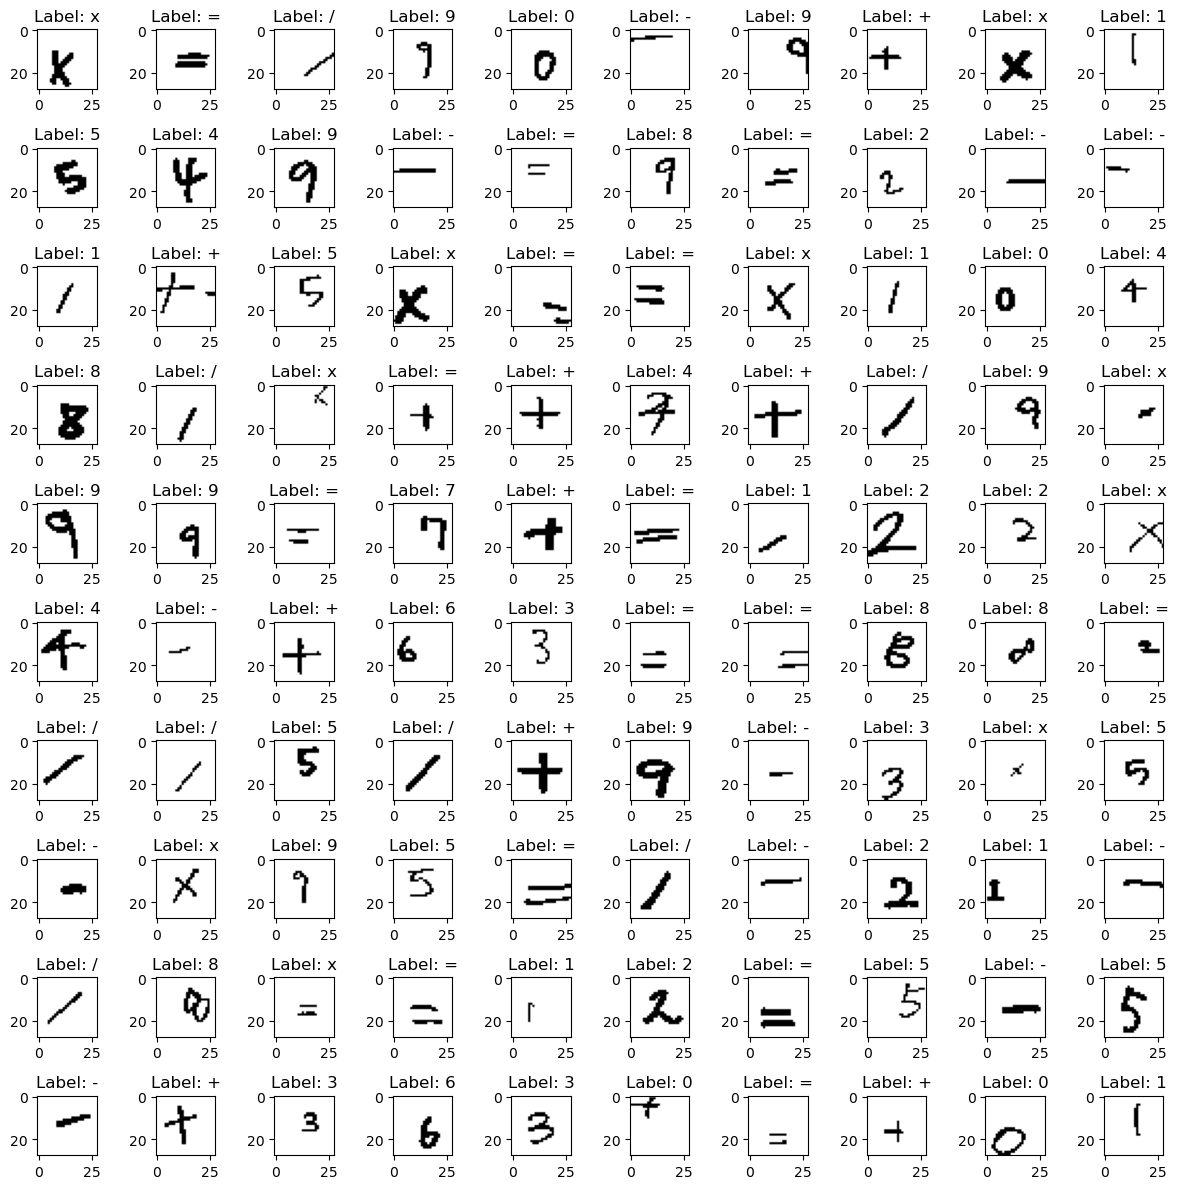

In [11]:
np.random.seed(40)
plot_multi_random(X_train_relabeled, y_train_relabeled)

1. rebase
2. border deletion
3. dot deletion
4. resize

전처리 할것들 목록

## 전처리 함수

In [4]:
def rebase_center_images(images):
    r = 28
    c = 28
    images = images.reshape(len(images), 28, 28)
    rebased_images = []

    for img in images:
        r = 28
        c = 28
        # each boundary
        r_top = r
        r_bot = -1
        c_left = c
        c_right = -1

        for n in range(r):
            for m in range(c):

                # if the pixel has whatever value
                if img[n][m] != 0:
                    # update the boundary
                    r_top = min(r_top, n)
                    r_bot = max(r_bot, n)
                    c_left = min(c_left, m)
                    c_right = max(c_right, m)

        c_len = c_right - c_left + 1
        r_len = r_bot - r_top + 1

        c_start = int((c - c_len) / 2)
        r_start = int((r - r_len) / 2)

        rebased_data = np.zeros((r, c), dtype="float64")

        # rebase into a center
        rebased_data[r_start:r_start + r_len, c_start:c_start + c_len] = img[r_top:r_bot + 1, c_left:c_right + 1]

        rebased_images.append(rebased_data.reshape(784))  # Reshape to (784,)

    return np.array(rebased_images)


def detect_del_boundary_images(images, thickness=3, threshold=15):
    images = images.reshape(len(images), 28, 28)
    deleted_images = []

    for img in images:

        curr = np.reshape(img, (28, 28))

        # how much you want to look at
        t = thickness
        # the threshold
        threshold_t = threshold

        for i in range(thickness):
            cnt_top = np.count_nonzero(curr[i:i + 1, :])
            cnt_down = np.count_nonzero(curr[28 - i:28 - i + 1, :])
            cnt_left = np.count_nonzero(curr[:, i:i + 1])
            cnt_right = np.count_nonzero(curr[:, 27 - i:27 - i + 1])

            if cnt_top > threshold_t:
                curr[0:t, :] = 0.

            if cnt_down > threshold_t:
                curr[28 - t:28, :] = 0.

            if cnt_left > threshold_t:
                curr[:, 0:t] = 0.

            if cnt_right > threshold_t:
                curr[:, 28 - t:28] = 0.

        deleted_images.append(curr.reshape(784))  # Reshape to (784,)

    return np.array(deleted_images)


def dfs(r, c, img, visited):
    st = list()
    st.append([r, c])

    cord = [[1, 1], [1, 0], [1, -1], [0, 1], [0, -1], [-1, 1], [-1, 0], [-1, -1]]

    dot = list()

    while st:
        curr = st.pop()

        if visited[curr[0]][curr[1]] == 1.: continue

        dot.append(curr)
        visited[curr[0]][curr[1]] = 1.

        for n, m in enumerate(cord):
            row = curr[0] + m[0]
            col = curr[1] + m[1]

            if 0 <= row < 28 and 0 <= col < 28:
                if img[row][col] != 0. and visited[row][col] == 0.:
                    st.append([row, col])

    return dot, visited


def d_deletion_images(images, dot_size=4):
    images = images.reshape(len(images), 28, 28)
    deleted_images = []

    for img in images:

        # to check whether we visited
        isVisited = np.full((28, 28), 0.)

        # dots that needs to be deleted afterwards
        dots = list()

        for i in range(28):
            for j in range(28):
                if img[i][j] != 0. and not isVisited[i][j]:
                    dot, isVisited = dfs(i, j, img, isVisited)

                    if len(dot) <= dot_size:
                        dots.extend(dot)

            for n, m in enumerate(dots):
                img[m[0], m[1]] = 0.

        deleted_images.append(img.reshape(784))  # Reshape to (784,)

    return np.array(deleted_images)


def resize_images(images, size=20):
    images = images.reshape(len(images), 28, 28)
    resized_images = []

    for img in images:
        r = 28
        c = 28

        # each boundary
        r_top = r
        r_bot = -1
        c_left = c
        c_right = -1

        for n in range(r):
            for m in range(c):

                # if the pixel has whatever value
                if img[n][m] != 0:
                    # update the boundary
                    r_top = min(r_top, n)
                    r_bot = max(r_bot, n)
                    c_left = min(c_left, m)
                    c_right = max(c_right, m)

        row_len = r_bot - r_top + 1
        col_len = c_right - c_left + 1

        adjusted_img = img[r_top:r_bot + 1, c_left:c_right + 1]

        diff = abs(row_len - col_len)

        top_pad = int(diff / 2)
        down_pad = int(diff / 2)

        if diff % 2 == 1:
            top_pad += 1

        if row_len > col_len:
            adjusted_img = np.pad(adjusted_img, pad_width=((0, 0), (top_pad, down_pad)), mode="constant")

        else:
            adjusted_img = np.pad(adjusted_img, pad_width=((top_pad, down_pad), (0, 0)), mode="constant")

        import cv2

        try:
            # using inter_nearest
            resized_img = cv2.resize(adjusted_img, dsize=(size, size), interpolation=0)
        except:
            resized_img = adjusted_img

        resized_img = np.pad(resized_img, int((28 - size) / 2), mode="constant")

        resized_images.append(resized_img)

    return np.array(resized_images)


def preprocessing_images(images, rebase=True, b_del=True, d_del=True, re_size=True):
    
    img_preprocessed = images

    # rebase
    if rebase:
        img_preprocessed = rebase_center_images(images)

    # border deletion
    if b_del:
        img_preprocessed = detect_del_boundary_images(img_preprocessed)

    # dot deletion
    if d_del:
        img_preprocessed = d_deletion_images(img_preprocessed)

    # resize
    if re_size:
        img_preprocessed = resize_images(img_preprocessed)

    return img_preprocessed.reshape(-1,784)

# # 전처리 진행
# X_train_relabeled_preprocessed = preprocessing_images(X_train_relabeled)

In [5]:
def rebase_center(img):
    r = 28
    c = 28

    # each boundary
    r_top = r
    r_bot = -1
    c_left = c
    c_right = -1

    for n in range(r):
        for m in range(c):

            # if the pixel has whatever value
            if img[n][m] != 0:
                # update the boundary
                r_top = min(r_top, n)
                r_bot = max(r_bot, n)
                c_left = min(c_left, m)
                c_right = max(c_right, m)

    # print(r_top,r_bot,c_left,c_right)

    c_len = c_right - c_left + 1
    r_len = r_bot - r_top + 1

    c_start = int((c - c_len) / 2)
    r_start = int((r - r_len) / 2)

    # print(c_len,r_len,c_start,r_start)

    rebased_data = np.zeros((r, c), dtype="float64")

    # rebase into a center
    rebased_data[r_start:r_start + r_len, c_start:c_start + c_len] = img[r_top:r_bot + 1, c_left:c_right + 1]

    return rebased_data


def detect_del_boundary(img, thickness=3, threshold=15):
    curr = np.reshape(img, (28, 28))

    # how much you want to look at
    t = thickness
    # the threshold
    threshold_t = threshold

    for i in range(thickness):
        cnt_top = np.count_nonzero(curr[i:i + 1, :])
        cnt_down = np.count_nonzero(curr[28 - i:28 - i + 1, :])
        cnt_left = np.count_nonzero(curr[:, i:i + 1])
        cnt_right = np.count_nonzero(curr[:, 27 - i:27 - i + 1])

        if cnt_top > threshold_t:
            curr[0:t, :] = 0.

        if cnt_down > threshold_t:
            curr[28 - t:28, :] = 0.

        if cnt_left > threshold_t:
            curr[:, 0:t] = 0.

        if cnt_right > threshold_t:
            curr[:, 28 - t:28] = 0.

    return curr

def dfs(r, c, img, visited):
    st = list()
    st.append([r, c])

    cord = [[1, 1], [1, 0], [1, -1], [0, 1], [0, -1], [-1, 1], [-1, 0], [-1, -1]]

    dot = list()

    while st:
        curr = st.pop()

        if visited[curr[0]][curr[1]] == 1.: continue

        dot.append(curr)
        visited[curr[0]][curr[1]] = 1.

        for n, m in enumerate(cord):
            row = curr[0] + m[0]
            col = curr[1] + m[1]

            if 0 <= row < 28 and 0 <= col < 28:
                if img[row][col] != 0. and visited[row][col] == 0.:
                    st.append([row, col])

    return dot, visited


def d_deletion(img, dot_size=4):
    # to check whether we visited
    isVisited = np.full((28, 28), 0.)

    # dots that needs to be deleted afterwards
    dots = list()

    for i in range(28):
        for j in range(28):
            if img[i][j] != 0. and not isVisited[i][j]:
                dot, isVisited = dfs(i, j, img, isVisited)

                if len(dot) <= dot_size:
                    dots.extend(dot)

        for n, m in enumerate(dots):
            img[m[0], m[1]] = 0.

    return img


def resize(img, size=20):
    r = 28
    c = 28

    # each boundary
    r_top = r
    r_bot = -1
    c_left = c
    c_right = -1

    for n in range(r):
        for m in range(c):

            # if the pixel has whatever value
            if img[n][m] != 0:
                # update the boundary
                r_top = min(r_top, n)
                r_bot = max(r_bot, n)
                c_left = min(c_left, m)
                c_right = max(c_right, m)

    row_len = r_bot - r_top + 1
    col_len = c_right - c_left + 1

    adjusted_img = img[r_top:r_bot + 1, c_left:c_right + 1]

    diff = abs(row_len - col_len)

    top_pad = int(diff / 2)
    down_pad = int(diff / 2)

    if diff % 2 == 1:
        top_pad += 1

    if row_len > col_len:
        adjusted_img = np.pad(adjusted_img, pad_width=((0, 0), (top_pad, down_pad)), mode="constant")

    else:
        adjusted_img = np.pad(adjusted_img, pad_width=((top_pad, down_pad), (0, 0)), mode="constant")

    import cv2

    try:
        # using inter_nearest
        resized_img = cv2.resize(adjusted_img, dsize=(size, size), interpolation=0)
    except:
        return img

    resized_img = np.pad(resized_img, int((28 - size) / 2), mode="constant")

    return resized_img

def preprocessing(img, rebase=True, b_del=True, d_del=True, re_size=True, one_array=True):
    # size = len(img)
    
    # row and column length
    r = 28
    c = 28
    
    # reshape to 2-d array(for convenience)
    img_preprocessed = np.reshape(img,(-1,r,c))
    
    # rebase
    if rebase:
        print("rebase ongoing")
        
        for i,j in enumerate(img):
            img_preprocessed[i] = rebase_center(img_preprocessed[i])
        print("done!")
    
    # border deletion
    if b_del:
        print("border deletion ongoing")
        
        for i,j in enumerate(img):
            img_preprocessed[i] = detect_del_boundary(img_preprocessed[i],3,15)
            
        print("done!")
    
    # dot deletion
    if d_del:
        print("dot deletion ongoing")
        
        for i,j in enumerate(img):
            img_preprocessed[i] = d_deletion(img_preprocessed[i],dot_size=4)
            
        print("done!")
    
    
    # resize
    if re_size:
        print("resize ongoing")
        
        for i,j in enumerate(img):
            img_preprocessed[i] = resize(img_preprocessed[i],20)
        
        print("done!")
    
    return np.reshape(img_preprocessed,(-1,r*c)) if one_array else np.reshape(img_preprocessed,(-1,r,c))

In [6]:
# 전처리 진행
X_train_relabeled_preprocessed = preprocessing(X_train_relabeled)

NameError: name 'X_train_relabeled' is not defined

전처리 결과 확인

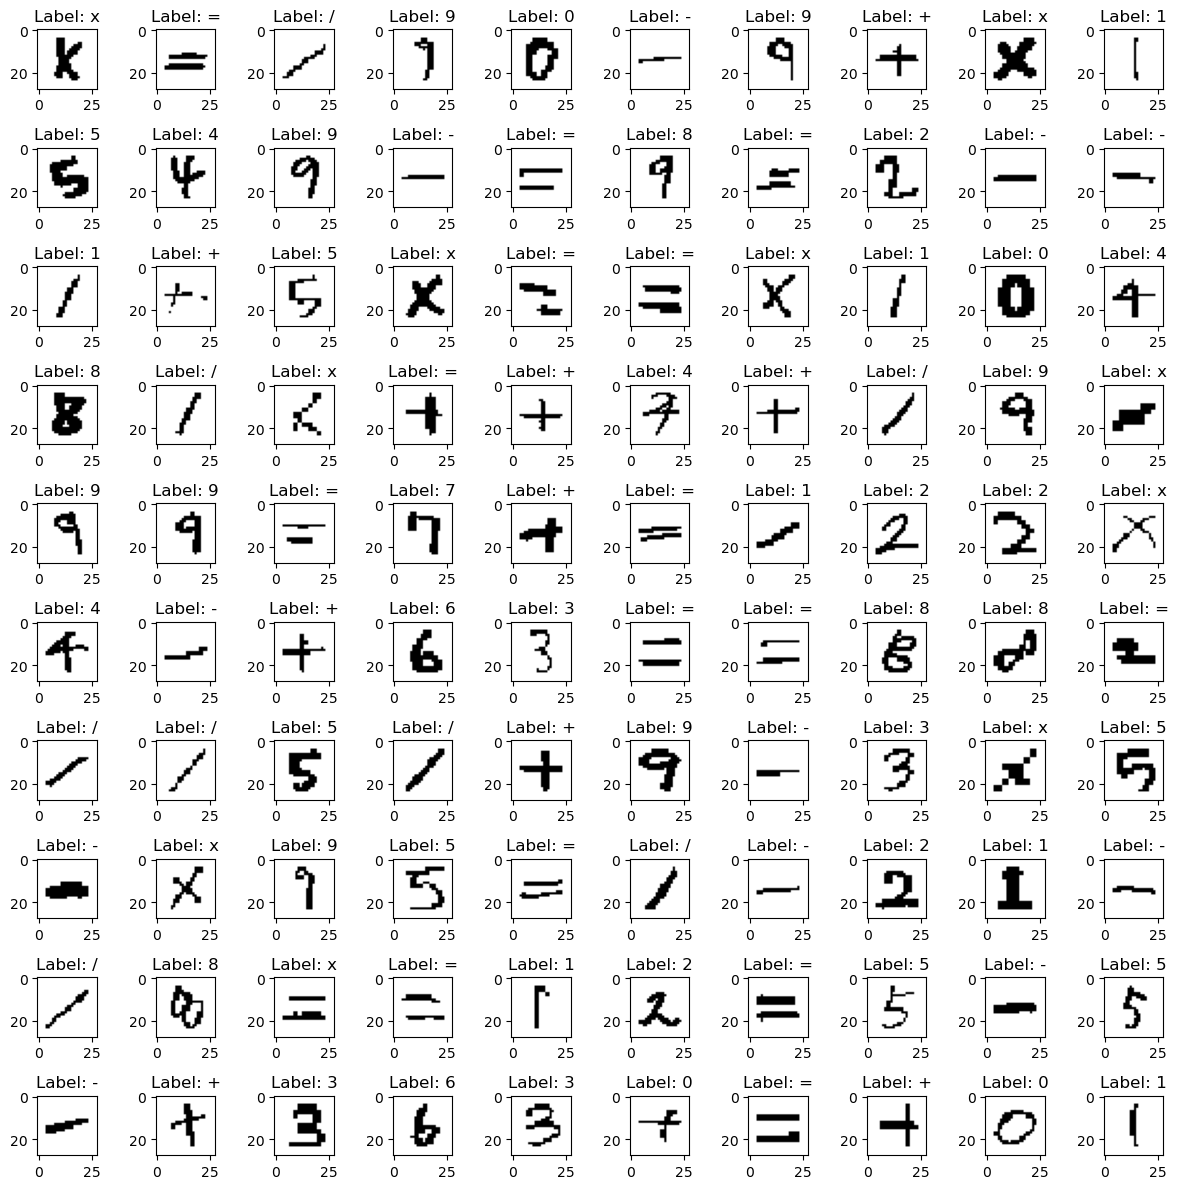

In [69]:
np.random.seed(40)
plot_multi_random(X_train_relabeled_preprocessed, y_train_relabeled)

대충 되긴하는데 리사이즈가 안된다

In [9]:
from sklearn.preprocessing import FunctionTransformer

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing_images)),
    ("rnd", rnd_clf)
]

pipeline_binarize = Pipeline(preprocess)
pipeline_binarize.fit(X_train_original, y_train_original)

predictions = pipeline_binarize.predict(X_test_original)
accuracy = accuracy_score(y_test_original, predictions)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

predictions = pipeline_binarize.predict(test_handmade_img)
accuracy = accuracy_score(test_handmade_label, predictions)
print(f"Decision Tree Accuracy: {accuracy:.4f}")


NameError: name 'X_train_original' is not defined

클리닝 하고 전처리 파이프라인 연결후 성능이 조금 향상됐

# Data Augmentation
데이터 증강  
original에 비해 기호의 데이터가 적으므로 data argument를 진행해서
기호의 데이터 개수를 늘려보자

여기서 비율을 나누는게 맞지 않을까?


In [18]:
from scipy.ndimage import shift, rotate
from sklearn.preprocessing import Binarizer
import cv2


def rotate_image(images, x, threshold=0.5):
    images = images.reshape(len(images),28,28)
    augmented_images = []
    for img in images:
        rotated_image = rotate(img, x, reshape=False)
        augmented_images.append(rotated_image.reshape(784))

    binarizer = Binarizer(threshold=threshold)
    binarized_images = binarizer.fit_transform(augmented_images)

    return np.array(binarized_images)


def augment_data(images, scale=1.05, threshold=0.5):
    images = images.reshape(len(images),28,28)
    augmented_images = []
    for img in images:
        width = int(img.shape[1] * scale)
        height = int(img.shape[0] * scale)
        dim = (width, height)
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        if scale > 1:  # 확대인 경우 중앙을 crop
            start = int((scale - 1) * img.shape[0] / 2)
            end = start + img.shape[0]
            resized = resized[start:end, start:end]
        else:  # 축소인 경우 padding을 추가
            pad = int((img.shape[0] - resized.shape[0]) / 2)
            resized = cv2.copyMakeBorder(resized, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)
        # 이미지를 784로 reshape
        reshaped = resized.reshape(784)
        augmented_images.append(reshaped)

    binarizer = Binarizer(threshold=threshold)
    binarized_images = binarizer.fit_transform(augmented_images)

    return np.array(binarized_images)


In [19]:

'''
X_train_relabeled_left_15 = rotate_image(X_train_relabeled, 15)
'''

X_train_relabeled_right_15 = rotate_image(X_train_relabeled, -15)

'''
X_train_relabeled_left_7 = rotate_image(X_train_relabeled, 7)
X_train_relabeled_right_7 = rotate_image(X_train_relabeled, -7)
'''

'''
num_trVal_argumentaion_in = augment_data(num_trVal_img, 1.07) #축소 비율에 맞추어 1.07배 확대
num_trVal_argumentaion_out = augment_data(num_trVal_img, 0.93) #93% 미만으로 했을때 픽셀이깨짐

sym_trVal_argumentaion_in = augment_data(sym_trVal_img, 1.07) #축소 비율에 맞추어 1.07배 확대
sym_trVal_argumentaion_out = augment_data(sym_trVal_img, 0.93) #93% 미만으로 했을때 픽셀이깨짐
'''




'\nnum_trVal_argumentaion_in = augment_data(num_trVal_img, 1.07) #축소 비율에 맞추어 1.07배 확대\nnum_trVal_argumentaion_out = augment_data(num_trVal_img, 0.93) #93% 미만으로 했을때 픽셀이깨짐\n\nsym_trVal_argumentaion_in = augment_data(sym_trVal_img, 1.07) #축소 비율에 맞추어 1.07배 확대\nsym_trVal_argumentaion_out = augment_data(sym_trVal_img, 0.93) #93% 미만으로 했을때 픽셀이깨짐\n'

NameError: name 'X_train_relabeled_left_15' is not defined

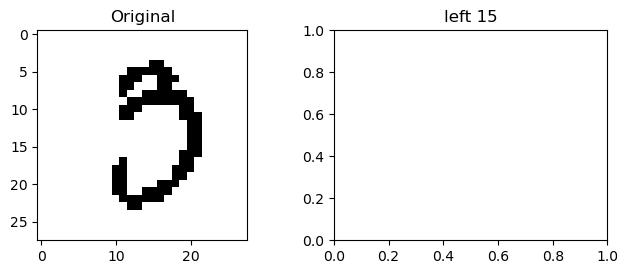

In [20]:
#변형된 데이터 확인


plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.title("Original")
plt.imshow(X_train_relabeled[100].reshape(28, 28),interpolation="nearest", cmap="Greys")

plt.subplot(232)
plt.title("left 15")
plt.imshow(X_train_relabeled_left_15[100].reshape(28, 28),interpolation="nearest", cmap="Greys")

plt.subplot(233)
plt.title("right 15")
plt.imshow(X_train_relabeled_right_15[100].reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(235)
plt.title("left 7")
plt.imshow(X_train_relabeled_left_7[100].reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(236)
plt.title("right 7")
plt.imshow(X_train_relabeled_right_7[100].reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.show()

In [20]:
# 증강된 데이터셋 생성
'''
X_train_relabeled_augmented = np.concatenate((X_train_relabeled, X_train_relabeled_left_15, X_train_relabeled_right_15, X_train_relabeled_left_7, X_train_relabeled_right_7), axis=0)
y_train_relabeled_augmented = np.concatenate((y_train_relabeled, y_train_relabeled, y_train_relabeled, y_train_relabeled, y_train_relabeled), axis=0)
'''

X_train_relabeled_augmented = np.concatenate((X_train_relabeled, X_train_relabeled_right_15), axis=0)
y_train_relabeled_augmented = np.concatenate((y_train_relabeled, y_train_relabeled), axis=0)

X_train_relabeled_augmented, y_train_relabeled_augmented = shuffle_dataset(X_train_relabeled_augmented, y_train_relabeled_augmented)


In [22]:
#결과확인

print(X.shape)
print(y.shape)

print(X_train_relabeled.shape)
print(y_train_relabeled.shape)

print(X_train_relabeled_augmented.shape)
print(y_train_relabeled_augmented.shape)

(70000, 784)
(70000,)
(30438, 784)
(30438,)
(60876, 784)
(60876,)


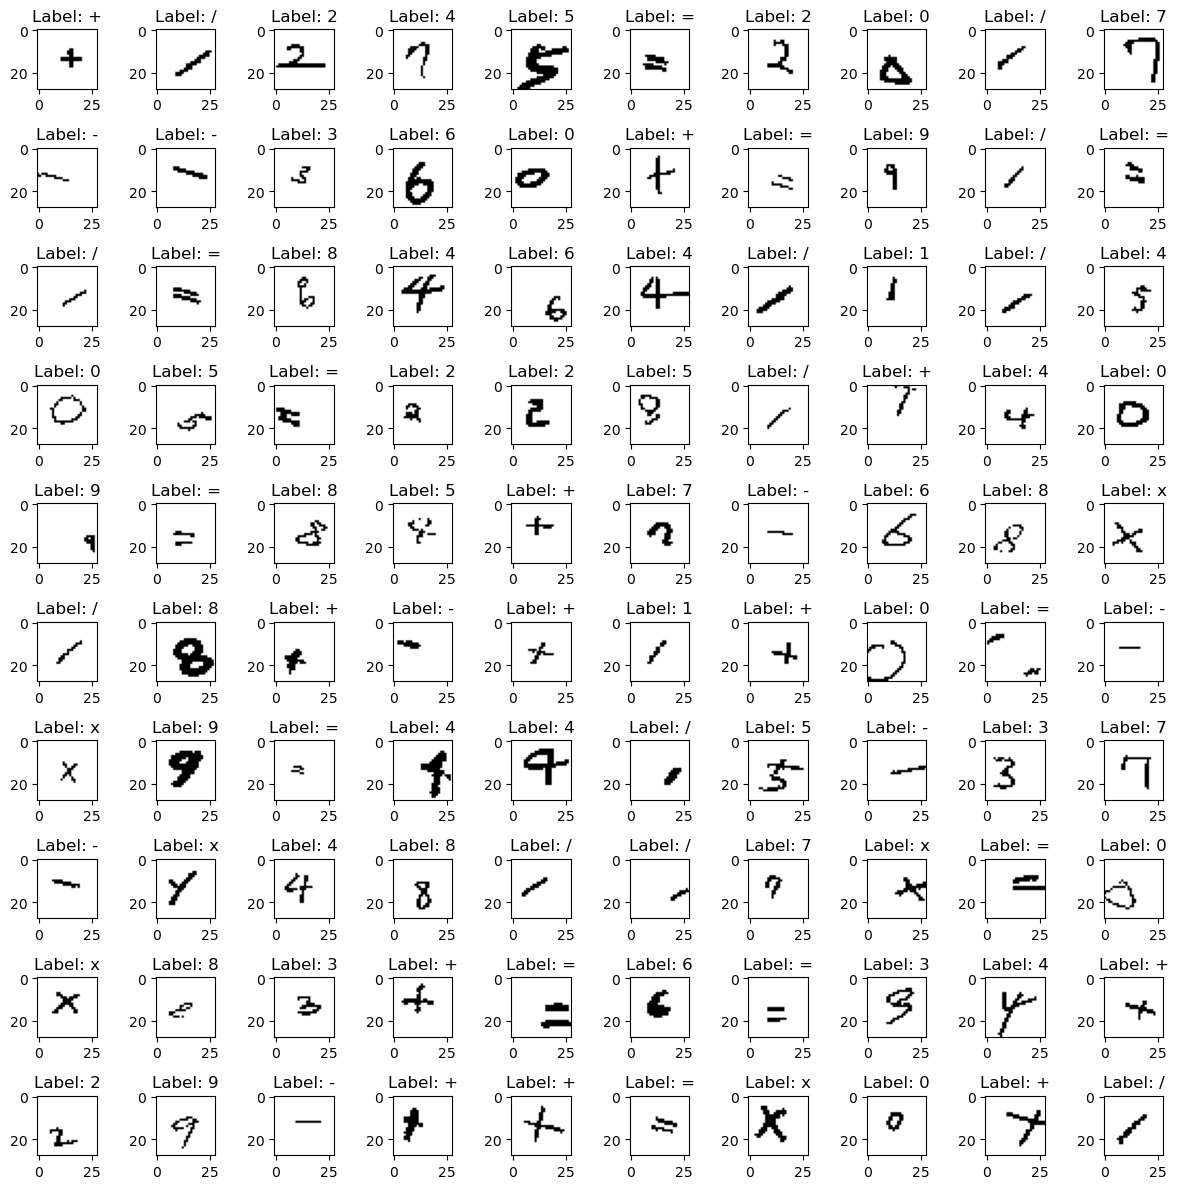

In [23]:
np.random.seed(40)
plot_multi_random(X_train_relabeled_augmented, y_train_relabeled_augmented )

In [21]:
# 데이터셋 결합
X_combined = np.concatenate((X, X_train_relabeled), axis=0)
y_combined = np.concatenate((y, y_train_relabeled), axis=0)

X_combined_augmented = np.concatenate((X, X_train_relabeled_augmented), axis=0)
y_combined_augmented = np.concatenate((y, y_train_relabeled_augmented), axis=0)


X_combined, y_combined = shuffle_dataset(X_combined, y_combined)
X_combined_augmented, y_combined_augmented = shuffle_dataset(X_combined_augmented, y_combined_augmented)


In [22]:
len(X_combined_augmented)

130876

original과 handamde 합칠 비율 선택해서 combined 만들기

증강안된 데이터셋 : 오리지널+핸드메이드  
증강된 데이터셋 : 오리지널 + 핸드메이드+증강된거  
두개 성능 비교해서 증강된게 좋으면 1:1:1이 좋다

파이프라인으로 연결해서 성능 비교해보자

In [23]:
from sklearn.model_selection import train_test_split


# 데이터를 train, valid, test로 나눕니다
X_train_combined, X_temp, y_train_combined, y_temp = train_test_split(X_combined, y_combined, test_size=0.4, random_state=42)
X_valid_combined, X_test_combined, y_valid_combined, y_test_combined = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 각 데이터셋의 크기를 확인합니다
print(f"증강안된 데이터 전체 개수: {len(X_combined)}")  # 70000 + 30000

print(f"증강안된 Train 데이터 개수: {len(X_train_combined)}")
print(f"증강안된 Valid 데이터 개수: {len(X_valid_combined)}")
print(f"증강안된 Test 데이터  개수: {len(X_test_combined)}")


# 데이터를 train, valid, test로 나눕니다
X_train_combined_augmented, X_temp, y_train_combined_augmented, y_temp = train_test_split(X_combined_augmented, y_combined_augmented, test_size=0.2, random_state=42)
X_valid_combined_augmented, X_test_combined_augmented, y_valid_combined_augmented, y_test_combined_augmented = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 각 데이터셋의 크기를 확인합니다
print(f"증강된 데이터 전체 개수: {len(X_combined_augmented)}") # 70000 + 3000 + 120000

print(f"증강된 Train 데이터 개수: {len(X_train_combined_augmented)}")
print(f"증강된 Valid 데이터 개수: {len(X_valid_combined_augmented)}")
print(f"증강된 Test 데이터  개수: {len(X_test_combined_augmented)}")

증강안된 데이터 전체 개수: 100438
증강안된 Train 데이터 개수: 60262
증강안된 Valid 데이터 개수: 20088
증강안된 Test 데이터  개수: 20088
증강된 데이터 전체 개수: 130876
증강된 Train 데이터 개수: 104700
증강된 Valid 데이터 개수: 13088
증강된 Test 데이터  개수: 13088


In [24]:
y_train_combined_augmented.shape

(104700,)

Train 데이터:


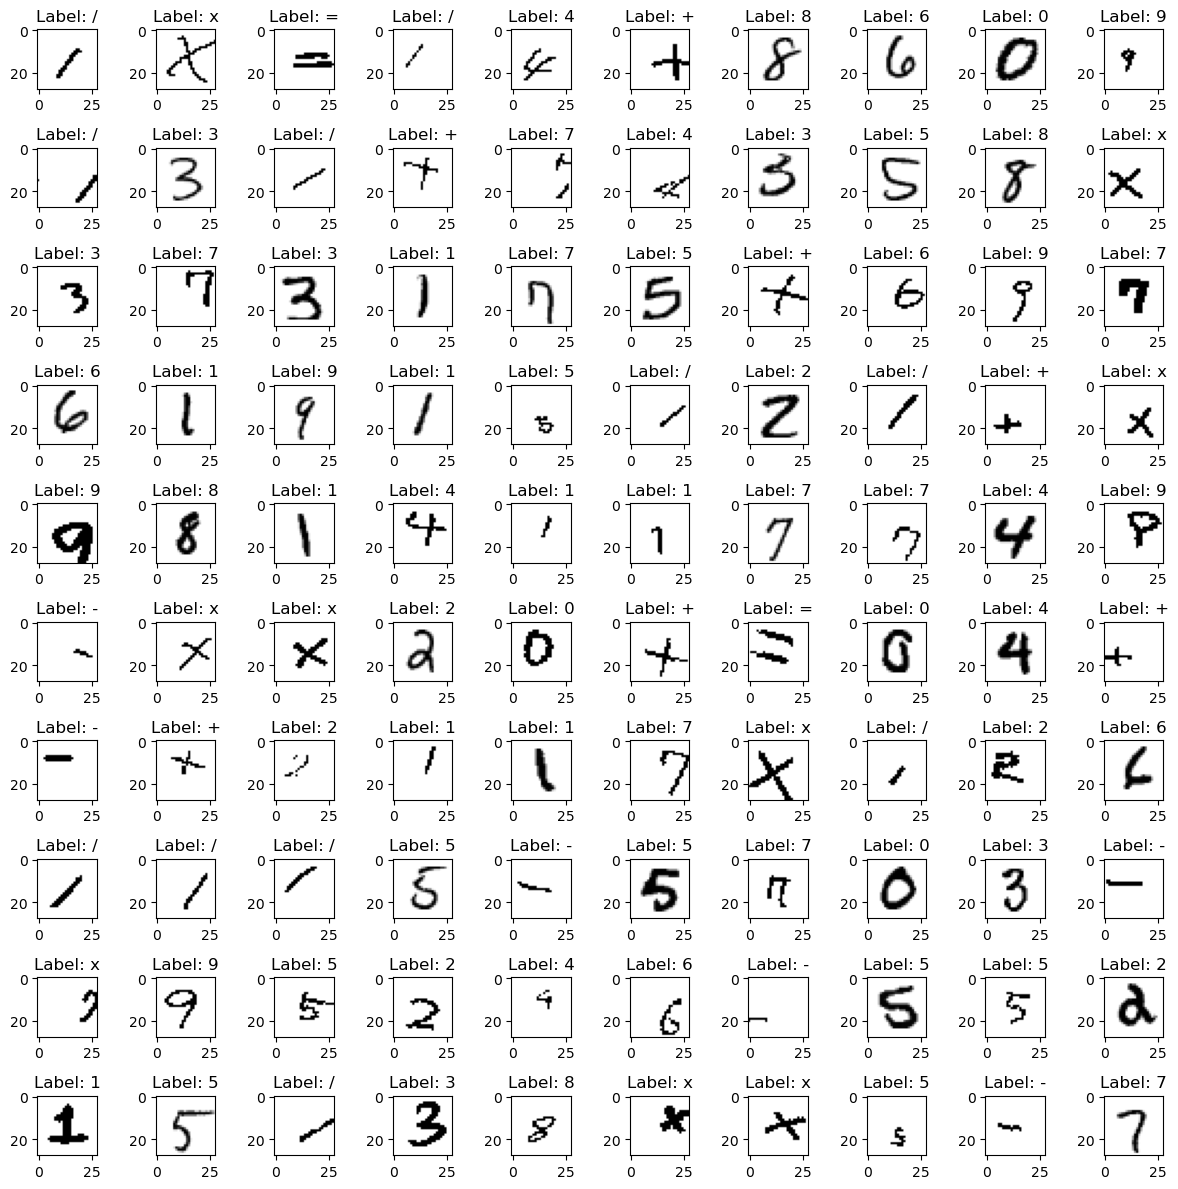

In [29]:
# Train 데이터셋에서 랜덤하게 30개의 이미지와 레이블을 출력합니다
print("Train 데이터:")

np.random.seed(40)
plot_multi_random(X_train_combined_augmented, y_train_combined_augmented)

Valid 데이터:


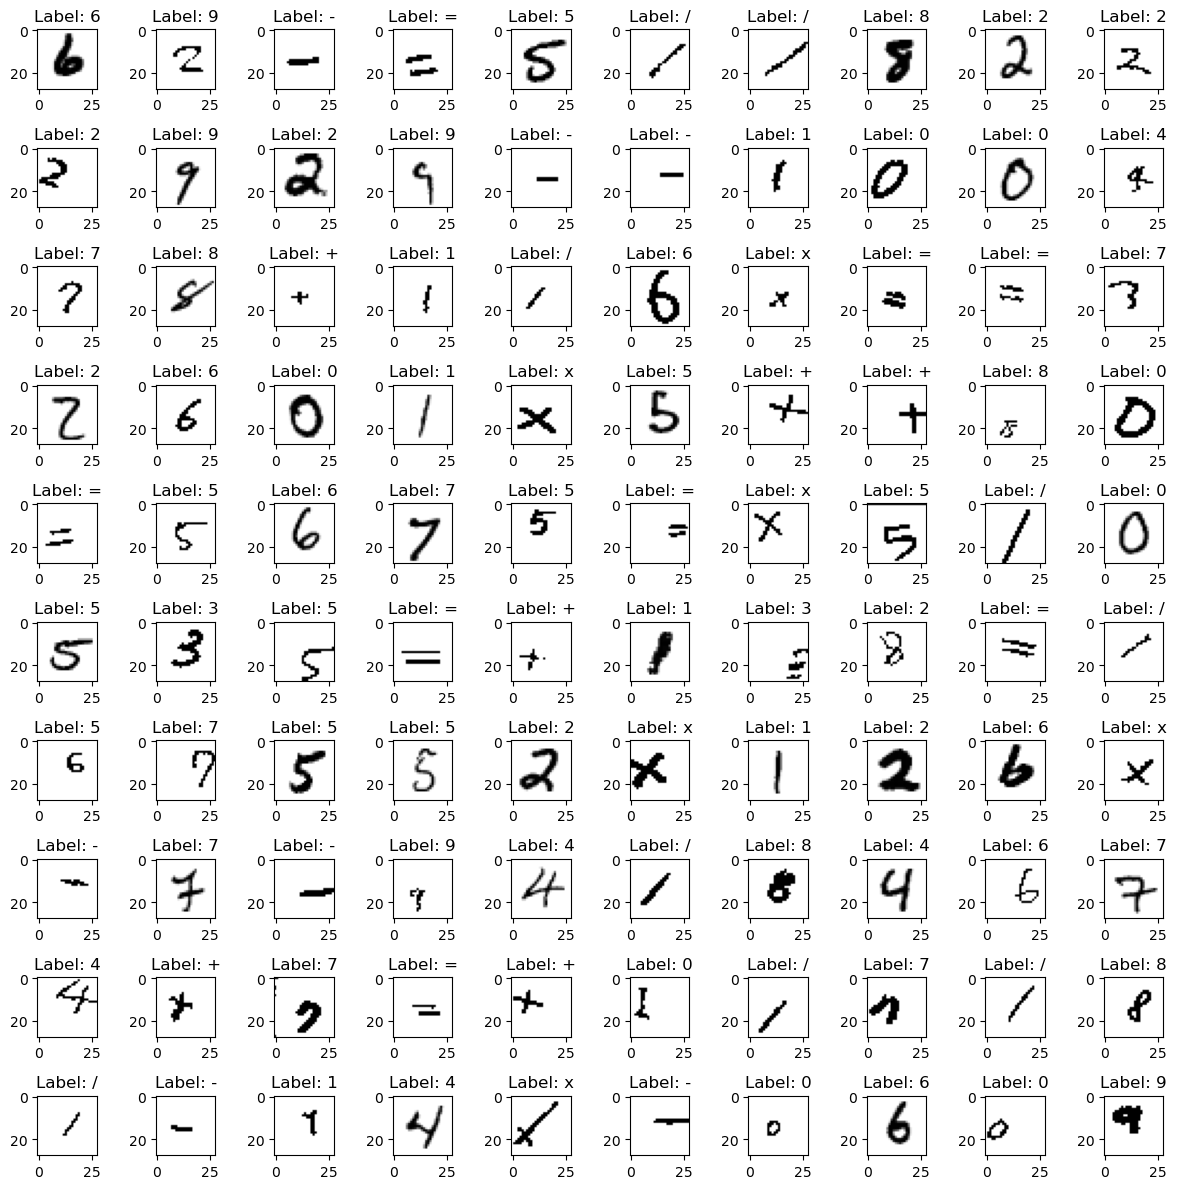

In [30]:
# Valid 데이터셋에서 랜덤하게 30개의 이미지와 레이블을 출력합니다
print("Valid 데이터:")

np.random.seed(40)
plot_multi_random(X_valid_combined_augmented, y_valid_combined_augmented)

Test 데이터:


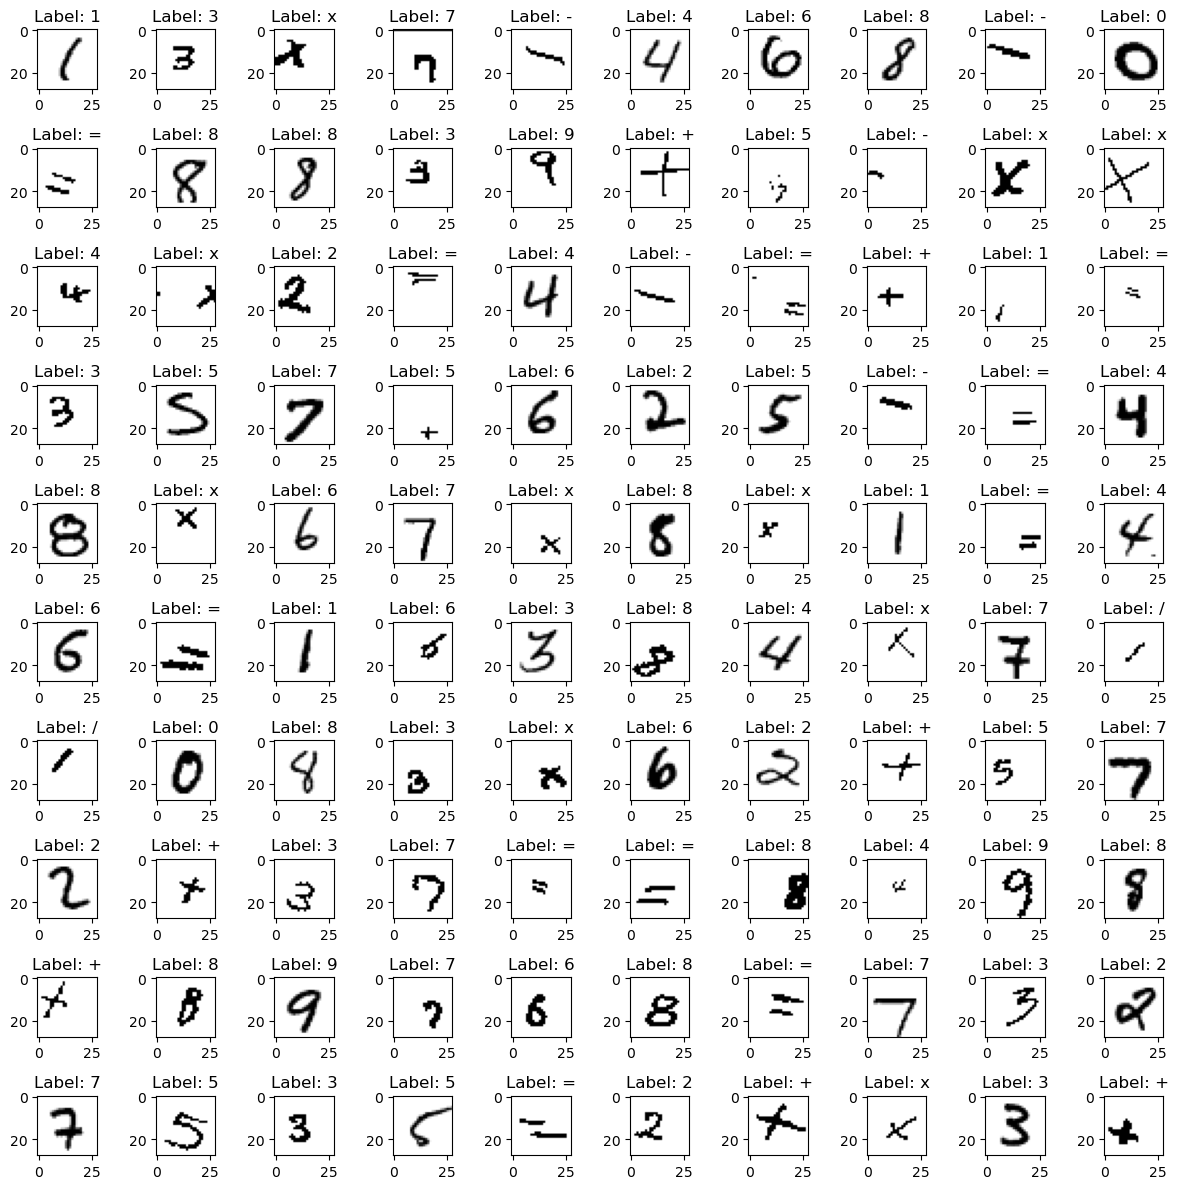

In [31]:
# Test 데이터셋에서 랜덤하게 30개의 이미지와 레이블을 출력합니다
print("Test 데이터:")

np.random.seed(40)
plot_multi_random(X_test_combined_augmented, y_test_combined_augmented)

6:2:2로 나누기

In [51]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)


preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing_images)),
    ("rnd", rnd_clf)
]


pipeline_binarize = Pipeline(preprocess)
pipeline_binarize.fit(X_train_combined, y_train_combined)

# predictions = pipeline_binarize.predict(X_test_original)
accuracy = accuracy_score(y_test_original, predictions)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

predictions = pipeline_binarize.predict(test_handmade_img)
accuracy = accuracy_score(test_handmade_label, predictions)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

NameError: name 'y_test_original' is not defined

# 라. 학습에 사용할 모델 선택

combined dataset 사용

 combined dataset을 이용하여 다수의 후보를 대상으로 가장 성능이 좋은 최종 모델 선택. 근거와 학습 계획 제시
predict는 valid 사용
 학습시간, score 측정


###모델 학습에 사용할 변수명 참고

훈련 데이터 ( X_train_combined_augmented  ,  y_train_combined_augmented)

검증 데이터   (  X_valid_combined_augmented  ,  y_valid_combined_augmented)

테스트데이터 (X_test_combined_augmented,y_test_combined_augmented)

## model training

모델 후보

- SGD
- SVM
- softmax
- KNN
- DT
- Extra Tree
- Random forest
- Voting Classifier
- bagging
- Gradient Boosting
- Naive Bayes



In [70]:
X_train_combined_augmented.shape

(57526, 784)

In [71]:
#SGD - 송준석
from sklearn.linear_model import SGDClassifier
import time

sgd_model = SGDClassifier(random_state=42)

preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing)),
    ("SGD_model", sgd_model)
]

pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)  ## 여기
end_time = time.time()
fiiting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)  ## 역기
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_sgd = accuracy_score(y_valid_combined_augmented, predictions)  # 여기
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_SGD: {accuracy_sgd.mean():.4f}")
print(f"fiiting_time : {fiiting_time:.4f} seconds")
print(f"predict_time : {predict_time:.4f} seconds")
print(f"scoring_time : {scoring_time:.4f} seconds")

rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
accuracy_SGD: 0.7464
fiiting_time : 68.3649 seconds
predict_time : 16.4960 seconds
scoring_time : 0.0070 seconds


In [34]:
#SVM- 송준석
from sklearn.svm import SVC
import time

svm_model = SVC(random_state=42)

preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing)),
    ("SVM_model", svm_model)
]

pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)  ## 여기
end_time = time.time()
fiiting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)  ## 역기
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_svm = accuracy_score(y_valid_combined_augmented, predictions)  # 여기
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_SVM: {accuracy_svm.mean():.4f}")
print(f"fiiting_time : {fiiting_time:.4f} seconds")
print(f"predict_time : {predict_time:.4f} seconds")
print(f"scoring_time : {scoring_time:.4f} seconds")


accuracy_SVM: 0.8859
fiiting_time : 349.9788 seconds
predict_time : 214.5957 seconds
scoring_time : 0.0156 seconds


In [72]:
#Softmax-송준석
from sklearn.linear_model import LogisticRegression
import time

softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing)),
    ("softmax_model", softmax_model)
]

pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)  ## 여기
end_time = time.time()
fiiting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)  ## 역기
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_softmax = accuracy_score(y_valid_combined_augmented, predictions)  # 여기
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_SoftMAX: {accuracy_softmax.mean():.4f}")
print(f"fiiting_time : {fiiting_time:.4f} seconds")
print(f"predict_time : {predict_time:.4f} seconds")
print(f"scoring_time : {scoring_time:.4f} seconds")

rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!


C:\Users\Choi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
accuracy_SoftMAX: 0.7759
fiiting_time : 58.5598 seconds
predict_time : 17.5451 seconds
scoring_time : 0.0120 seconds


In [74]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()


preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing)),
    ("knn_model", knn_model)
]


pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)  ## 여기
end_time = time.time()
fiiting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)  ## 역기
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_nb = accuracy_score(y_valid_combined_augmented, predictions)  # 여기
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_nb: {accuracy_nb.mean():.4f}")
print(f"fiiting_time : {fiiting_time:.4f} seconds")
print(f"predict_time : {predict_time:.4f} seconds")
print(f"scoring_time : {scoring_time:.4f} seconds")


rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
accuracy_nb: 0.8432
fiiting_time : 57.8730 seconds
predict_time : 26.5149 seconds
scoring_time : 0.0130 seconds


In [75]:
# DT changed

dt_model=DecisionTreeClassifier(random_state=42)
preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing)),
    ("dt_model", dt_model)
]

pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)  ## 여기
end_time = time.time()
fiiting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)  ## 역기
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_dt = accuracy_score(y_valid_combined_augmented, predictions)  # 여기
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_nb: {accuracy_dt.mean():.4f}")
print(f"fiiting_time : {fiiting_time:.4f} seconds")
print(f"predict_time : {predict_time:.4f} seconds")
print(f"scoring_time : {scoring_time:.4f} seconds")

rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
accuracy_nb: 0.7082
fiiting_time : 55.4797 seconds
predict_time : 17.8789 seconds
scoring_time : 0.0120 seconds


In [76]:
# Extra Tree
extra_trees_model = ExtraTreesClassifier(n_estimators=10, random_state=42)


preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing)),
    ("extra_trees_model", extra_trees_model)
]


pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)  ## 여기
end_time = time.time()
fiiting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)  ## 역기
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_nb = accuracy_score(y_valid_combined_augmented, predictions)  # 여기
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_nb: {accuracy_nb.mean():.4f}")
print(f"fiiting_time : {fiiting_time:.4f} seconds")
print(f"predict_time : {predict_time:.4f} seconds")
print(f"scoring_time : {scoring_time:.4f} seconds")

rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
accuracy_nb: 0.8473
fiiting_time : 55.2934 seconds
predict_time : 17.3535 seconds
scoring_time : 0.0120 seconds


In [77]:
# Random forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)


preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing)),
    ("rf_model", rf_model)
]


pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)  ## 여기
end_time = time.time()
fiiting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)  ## 역기
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_nb = accuracy_score(y_valid_combined_augmented, predictions)  # 여기
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_nb: {accuracy_nb.mean():.4f}")
print(f"fiiting_time : {fiiting_time:.4f} seconds")
print(f"predict_time : {predict_time:.4f} seconds")
print(f"scoring_time : {scoring_time:.4f} seconds")

rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
accuracy_nb: 0.8331
fiiting_time : 53.3848 seconds
predict_time : 17.1412 seconds
scoring_time : 0.0120 seconds


In [45]:
# Naive Bayes
nb_model = GaussianNB()


preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing_images)),
    ("nb_model", nb_model)
]


pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)  ## 여기
end_time = time.time()
fiiting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)  ## 역기
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_nb = accuracy_score(y_valid_combined_augmented, predictions)  # 여기
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_nb: {accuracy_nb.mean():.4f}")
print(f"fiiting_time : {fiiting_time:.4f} seconds")
print(f"predict_time : {predict_time:.4f} seconds")
print(f"scoring_time : {scoring_time:.4f} seconds")

accuracy_nb: 0.2489
fiiting_time : 37.4122 seconds
predict_time : 13.3537 seconds
scoring_time : 0.0156 seconds


In [78]:
# RNN

from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=42)

preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess', FunctionTransformer(preprocessing)),
    ("mlp_model", mlp_model)
]

pipeline_binarize = Pipeline(preprocess)

start_time = time.time()
pipeline_binarize.fit(X_train_combined_augmented, y_train_combined_augmented)
end_time = time.time()
fitting_time = end_time - start_time

start_time = time.time()
predictions = pipeline_binarize.predict(X_valid_combined_augmented)
end_time = time.time()
predict_time = end_time - start_time

start_time = time.time()
accuracy_mlp = accuracy_score(y_valid_combined_augmented, predictions)
end_time = time.time()
scoring_time = end_time - start_time

print(f"accuracy_mlp: {accuracy_mlp.mean():.4f}")
print(f"fitting_time: {fitting_time:.4f} seconds")
print(f"predict_time: {predict_time:.4f} seconds")
print(f"scoring_time: {scoring_time:.4f} seconds")


rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!


C:\Users\Choi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!
accuracy_mlp: 0.8354
fitting_time: 228.2807 seconds
predict_time: 17.5517 seconds
scoring_time: 0.0070 seconds


In [49]:
# Voting
from sklearn.ensemble import VotingClassifier
import time

voting_model = VotingClassifier(
    estimators=[
        ('sgd', sgd_model),
        ('svm', svm_model),
        ('softmax', softmax_model),
        ('knn', knn_model)
    ],
    voting='hard',
    n_jobs=-1
)

start_time = time.time()
scores_voting = cross_val_score(voting_model, X_train_combined, y_train_combined, cv=5)
end_time = time.time()
scoring_time = end_time - start_time
print(f"scores_voting: {scores_voting.mean():.4f}")
print(f"scoring_time time: {scoring_time:.4f} seconds")

scores_voting: 0.5935
scoring_time time: 1694.7869 seconds


In [43]:
# Bagging

bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                  n_estimators=10, random_state=42)

start_time = time.time()
scores_bagging = cross_val_score(bagging_model, X_train_combined, y_train_combined, cv=5)
end_time = time.time()
scoring_time = end_time - start_time
print(f"scores_bagging: {scores_bagging.mean():.4f}")
print(f"scoring_time time: {scoring_time:.4f} seconds")

C:\Users\Choi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Choi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Choi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Choi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Choi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


scores_bagging: 0.7557
scoring_time time: 224.6329 seconds


In [44]:
# Gradient Boosting

gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

start_time = time.time()
scores_gd = cross_val_score(gb_clf, X_train_combined, y_train_combined, cv=5, scoring='accuracy')
end_time = time.time()
print(f"scores_gd: {scores_gd.mean():.4f}")
print(f"scoring_time time: {scoring_time:.4f} seconds")

scores_gd: 0.5463
scoring_time time: 224.6329 seconds


# 마. 모델 최적화 및 분석

combined dataset을 이용한 학습 및 model 최적화, hyperparameter의 최적화

학습시간, 예측시간(inference time), 정확도 측면에서 분석

Original dataset과 combined dataset으로 각각 학습한 모델에 대해 orignal test dataset과 hand-made test dataset에 대한 성능 비교 분석.

Epoch에 따른 learning curve 제시

feature engineering 해보기

Error Analysis

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")

plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                  sample_weight=sample_weight, normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                  sample_weight=sample_weight, normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")

plt.show()

plt.rc('font', size=14)  # make fonts great again

## model validation

In [33]:
#SVM- 송준석
from sklearn.svm import SVC
import time

preprocess = [
    ('binarizer', Binarizer(threshold=0.5)),
    ('preprocess',FunctionTransformer(preprocessing)),
    ("SVM_model", SVC(random_state=42))
]

pipeline_binarize = Pipeline(steps=preprocess, verbose=True)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

from sklearn.pipeline import make_pipeline

svc_grid = make_pipeline(Binarizer(threshold=0.5),FunctionTransformer(preprocessing),GridSearchCV(SVC(random_state=42),param_grid=param_grid,cv=3,n_jobs=-1))

# svc_grid.fit(X_train_combined, y_train_combined)

## model final test

In [34]:
svc_grid.fit(X_train_combined, y_train_combined)

rebase ongoing
done!
border deletion ongoing
done!
dot deletion ongoing
done!
resize ongoing
done!


Pipeline(steps=[('binarizer', Binarizer(threshold=0.5)),
                ('functiontransformer',
                 FunctionTransformer(func=<function preprocessing at 0x0000018D8A7E6200>)),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
                              param_grid={'C': [0.1, 1, 10],
                                          'kernel': ['linear', 'rbf',
                                                     'poly']}))])

In [40]:
svc_grid[2].best_score_

0.9396468576546662

In [42]:
svc_grid[2].best_estimator_

SVC(C=10, random_state=42)

In [43]:
res = svc_grid[2].cv_results_

In [46]:
res

{'mean_fit_time': array([ 580.0761373 , 1176.85125033, 1217.89110859,  816.92133832,
         632.98841961,  618.14810228, 1084.90469567,  499.11446492,
         385.21947757]),
 'std_fit_time': array([ 7.35748995,  4.71178925,  5.07991023, 11.69175981,  7.14219405,
         4.28625793, 19.74338661,  4.64451639,  2.55333498]),
 'mean_score_time': array([479.00571426, 869.76610875, 571.85340945, 494.75234334,
        558.5399967 , 356.56074007, 165.48960225, 419.1659255 ,
        244.04185224]),
 'std_score_time': array([ 1.41175928,  2.57411512,  1.1487126 ,  1.27861758,  2.17490796,
         3.22946422, 10.55746688,  1.83709564,  0.35934065]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'poly', 'linear', 'rbf', 'poly',
                    'linear', 'rbf', 

In [47]:
import pandas as pd

save = pd.DataFrame(res)

In [48]:
save

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,580.076137,7.357490,479.005714,1.411759,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.875548,0.872355,0.874645,0.874183,0.001344,6
1,1176.851250,4.711789,869.766109,2.574115,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.898746,0.897595,0.896998,0.897780,0.000725,5
2,1217.891109,5.079910,571.853409,1.148713,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.875796,0.872654,0.872007,0.873486,0.001655,7
3,816.921338,11.691760,494.752343,1.278618,1,linear,"{'C': 1, 'kernel': 'linear'}",0.851802,0.845273,0.848509,0.848528,0.002665,8
4,632.988420,7.142194,558.539997,2.174908,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.934239,0.932295,0.933240,0.933258,0.000794,2
5,618.148102,4.286258,356.560740,3.229464,1,poly,"{'C': 1, 'kernel': 'poly'}",0.921794,0.919152,0.918654,0.919867,0.001378,4
6,1084.904696,19.743387,165.489602,10.557467,10,linear,"{'C': 10, 'kernel': 'linear'}",0.828505,0.824812,0.828645,0.827321,0.001775,9
7,499.114465,4.644516,419.165926,1.837096,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.940711,0.939314,0.938916,0.939647,0.000770,1
8,385.219478,2.553335,244.041852,0.359341,10,poly,"{'C': 10, 'kernel': 'poly'}",0.930605,0.927416,0.927565,0.928529,0.001470,3
